In [34]:
import numpy as np
import scipy as sp
import librosa
import librosa.display
import matplotlib.pyplot as plt
import streamlit as st
import waipy
import pandas as pd
import altair as alt

from pages.additional.preprocessing import *
from pages.additional.plotting import *
from pages.additional.sup import *

y.shape=(20160,)


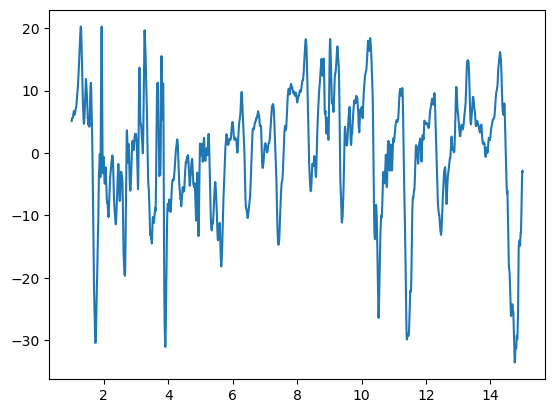

In [35]:
datapath = 'pages/app_data/current_data.csv'
data = pd.read_csv(datapath)
x, y = data.x, data.y
print(f'{y.shape=}')
plt.plot(x, y)

In [74]:
import random

def generate_samples(
    num_samples=1000,
    noise_std=1,
    x=x,
    y=y,
):
    samples = []
    ffts = []
    for i in range(num_samples):
        noisy = y + np.random.normal(0, noise_std, y.shape[0])
        samples.append(noisy)
        ffts.append(sp.fft.fft(noisy.values))
    return np.array(samples), np.array(ffts)


def random_color_hex():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return '#{0:02x}{1:02x}{2:02x}'.format(r, g, b)


def plot_samples(
    samples,
    x=x,
    num=5,
):
    elements = np.random.choice(samples.shape[0], size=num, replace=False)
    ys = samples[elements, :]
    # print(f'{ys.shape=}')
    # print(f'{ys[0]=}')
    plt.figure(figsize=(15, 5))
    for sample in ys:
        plt.plot(x, sample, color=random_color_hex())
        
    plt.show()
    
    
def plot_confidence_intervals(
    samples,
    x,
    original_fft=None,
):
    means = np.mean(np.abs(samples), axis=0)
    stds = np.std(np.abs(samples), axis=0)
    lower = means - 1.96 * stds
    upper = means + 1.96 * stds
    plt.figure(figsize=(15, 5))
    plt.plot(x, np.abs(means), label='Mean Amplitude')
    plt.fill_between(x, np.abs(lower), np.abs(upper), alpha=0.5, label='95% Confidence Interval')
    
    if (original_fft is not None):
        plt.plot(x, np.abs(original_fft), color='red', label='Original')
    
    plt.legend()
    plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    plt.show()



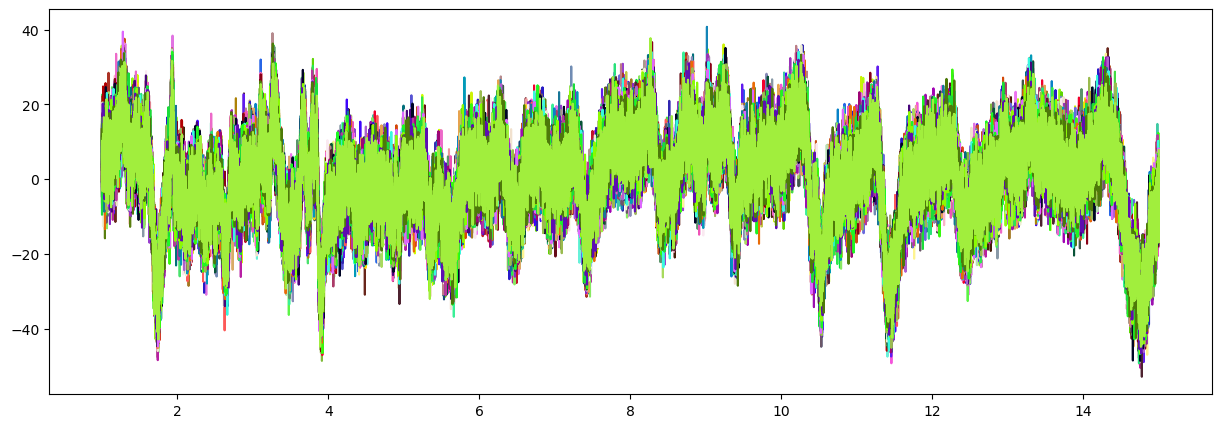

In [76]:
samples, ffts = generate_samples(1000, 5)
plot_samples(samples=samples, x=x, num=100)

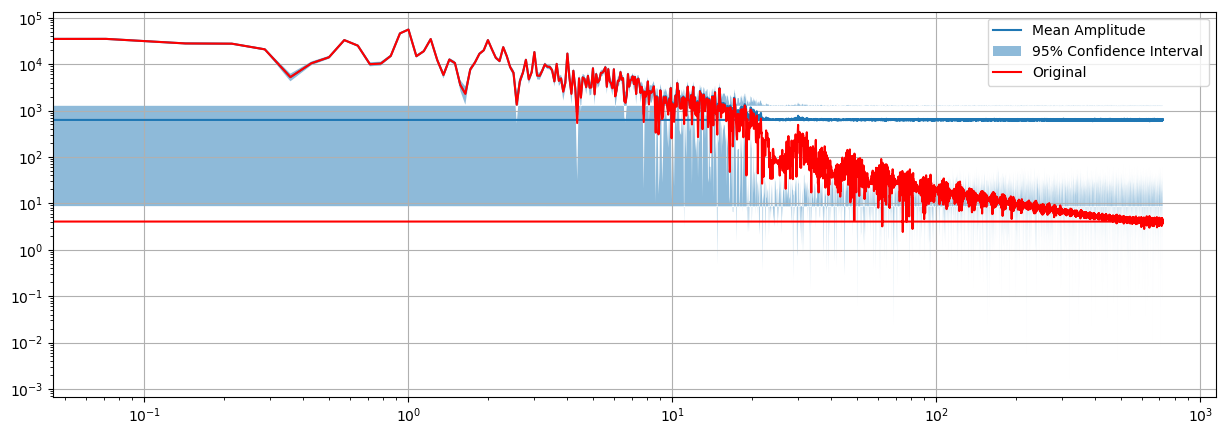

In [77]:
size = len(x)
sample_rate = 24 * 60
xf = sp.fft.fftfreq(size, 1 / sample_rate)
yf = sp.fft.fft(np.array(y))
plot_confidence_intervals(ffts, xf, yf)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


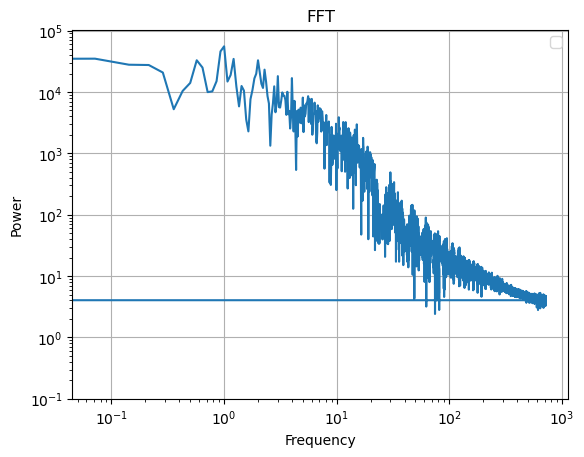

2024-05-06 00:35:23.204 
  command:

    streamlit run c:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


<Figure size 640x480 with 0 Axes>

In [66]:
plot_single(x=xf, y=np.abs(yf),label='FFT', type='pyplot', y_scale='log', x_scale='log', y_label='Power', x_label='Frequency')


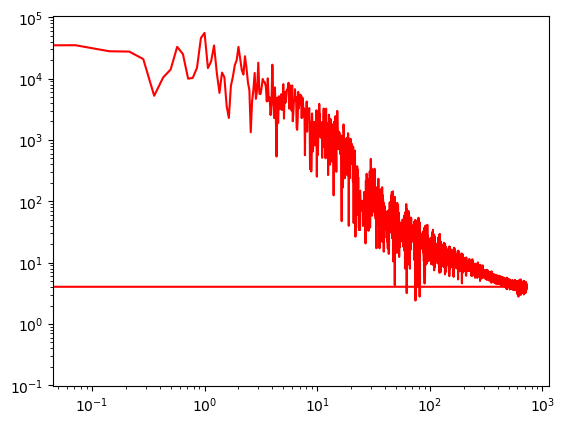

In [69]:
plt.plot(xf, np.abs(yf), color='red', label='Original')
plt.yscale('log')
plt.xscale('log')
plt.show()